In [ ]:
from google.colab import files

uploaded = files.upload()
import os

print(os.listdir("/content"))

import zipfile
import os

zip_file_path = "/content/archive (2).zip"
extract_dir = "/content/pest_dataset"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

os.listdir(extract_dir)

import shutil

source_dir = "/content/pest_dataset"
harmful_dir = "/content/harmful_pests"
beneficial_dir = "/content/beneficial_pests"

os.makedirs(harmful_dir, exist_ok=True)
os.makedirs(beneficial_dir, exist_ok=True)

harmful_pests = ["earwig", "catterpillar", "grasshopper", "slug", "snail", "weevil", "moth", "beetle"]
beneficial_pests = ["ants", "earthworms", "wasp", "bees"]


for pest in harmful_pests:
    src = os.path.join(source_dir, pest)
    dst = os.path.join(harmful_dir, pest)
    if os.path.exists(src):
        shutil.move(src, dst)

for pest in beneficial_pests:
    src = os.path.join(source_dir, pest)
    dst = os.path.join(beneficial_dir, pest)
    if os.path.exists(src):
        shutil.move(src, dst)

print("Harmful pests:", os.listdir(harmful_dir))
print("Beneficial pests:", os.listdir(beneficial_dir))

import os


def count_images(directory):
    pest_counts = {}
    for pest in os.listdir(directory):
        pest_path = os.path.join(directory, pest)
        if os.path.isdir(pest_path):  # Ensure it's a directory
            pest_counts[pest] = len(os.listdir(pest_path))
    return pest_counts

harmful_counts = count_images(harmful_dir)
beneficial_counts = count_images(beneficial_dir)

print("Harmful Pests Image Counts:", harmful_counts)
print("Beneficial Pests Image Counts:", beneficial_counts)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

import os

dataset_path = "/content"
print(os.listdir(dataset_path))

import os
import shutil

source_dirs = ["/content/beneficial_pests", "/content/harmful_pests"]
destination = "/content/pest_dataset"

os.makedirs(destination, exist_ok=True)

for source in source_dirs:
    for category in os.listdir(source):
        src_path = os.path.join(source, category)
        dest_path = os.path.join(destination, category)
        shutil.move(src_path, dest_path)

print("Dataset organized successfully!")

print(os.listdir(destination))



['.config', 'earthworms (100).jpg', '.ipynb_checkpoints', 'beneficial_pests', 'archive (2).zip', 'pest_dataset', 'harmful_pests', 'slug (100).jpg', 'grasshopper (100).jpg', 'pest_model.h5', 'Weevil (10).jpg', 'sample_data']
Harmful pests: ['catterpillar', 'moth', 'slug', 'weevil', 'grasshopper', 'snail', 'beetle', 'earwig']
Beneficial pests: ['ants', 'earthworms', 'bees', 'wasp']
Harmful Pests Image Counts: {'catterpillar': 434, 'moth': 497, 'slug': 391, 'weevil': 485, 'grasshopper': 485, 'snail': 500, 'beetle': 416, 'earwig': 466}
Beneficial Pests Image Counts: {'ants': 499, 'earthworms': 323, 'bees': 500, 'wasp': 498}
['.config', 'earthworms (100).jpg', '.ipynb_checkpoints', 'beneficial_pests', 'archive (2).zip', 'pest_dataset', 'harmful_pests', 'slug (100).jpg', 'grasshopper (100).jpg', 'pest_model.h5', 'Weevil (10).jpg', 'sample_data']
Dataset organized successfully!
['ants', 'catterpillar', 'moth', 'slug', 'weevil', 'grasshopper', 'earthworms', 'snail', 'bees', 'wasp', 'beetle', '

In [ ]:

import os

dataset_dir = "/content/pest_dataset"
classes = sorted(os.listdir(dataset_dir))
print(classes)


['ants', 'bees', 'beetle', 'catterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil']


Found 4399 images belonging to 12 classes.
Found 1095 images belonging to 12 classes.
Min pixel value: 0.0
Max pixel value: 1.0


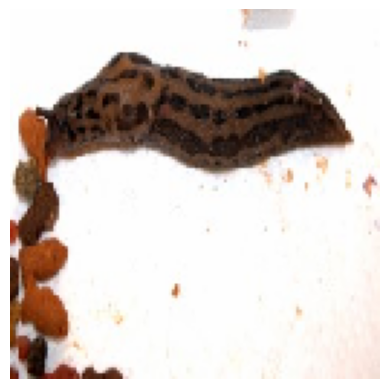

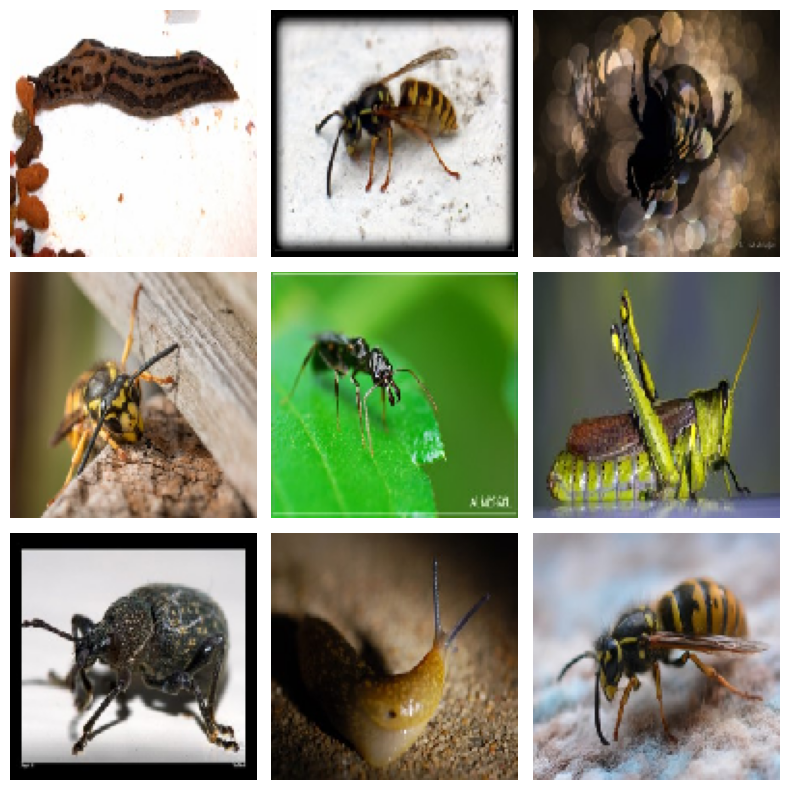

 File exists: /content/pest_dataset/beetle/beetle (1).jpg
 Image loaded successfully.


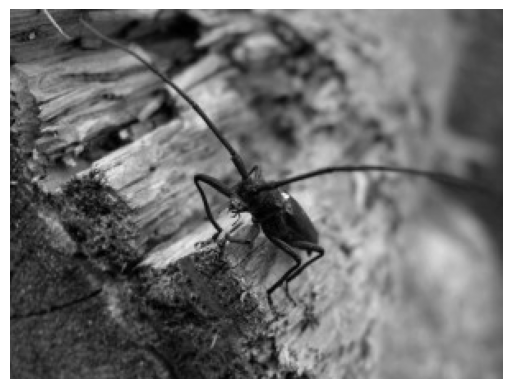

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
dataset_dir = "/content/pest_dataset"
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

import numpy as np

img, label = next(train_generator)

print("Min pixel value:", np.min(img[0]))
print("Max pixel value:", np.max(img[0]))

import matplotlib.pyplot as plt

plt.imshow(img[0])
plt.axis("off")
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(img[i])
    ax.axis("off")

plt.tight_layout()
plt.show()

import os

image_path = "/content/pest_dataset/beetle/beetle (1).jpg"

if os.path.exists(image_path):
    print(f" File exists: {image_path}")
else:
    print(f"Error: File not found at {image_path}")


import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/content/pest_dataset/beetle/beetle (1).jpg", cv2.IMREAD_GRAYSCALE)

if image is None:
    print(" Error: Image not loaded correctly.")
else:
    print(" Image loaded successfully.")
    plt.imshow(image, cmap='gray')
    plt.axis("off")
    plt.show()


 Image Blurry: False | Variance: 739.32


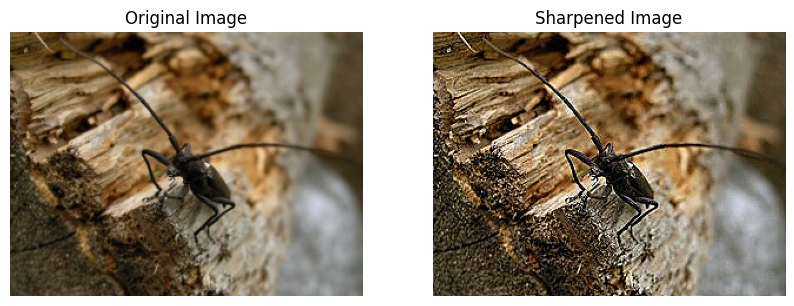

In [ ]:
def is_blurry(image_path, threshold=100):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Image not found.")
        return None, None

    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()

    return variance < threshold, variance

image_path = "/content/pest_dataset/beetle/beetle (1).jpg"
blurry, variance = is_blurry(image_path)

if blurry is None:
    print(" Could not process image.")
else:
    print(f" Image Blurry: {blurry} | Variance: {variance:.2f}")

import cv2
import numpy as np
import matplotlib.pyplot as plt

def sharpen_image(image_path):

    image = cv2.imread(image_path)
    if image is None:
        print(" Could not read the image.")
        return None

    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    sharpened = cv2.filter2D(image, -1, kernel)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Sharpened Image")
    axes[1].axis("off")

    plt.show()

    return sharpened

image_path = "/content/pest_dataset/beetle/beetle (1).jpg"
sharpened_image = sharpen_image(image_path)

import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
class_labels = ['ants', 'bees', 'beetle', 'caterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil']

print("Model Classes:", class_labels)

Model Classes: ['ants', 'bees', 'beetle', 'caterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil']


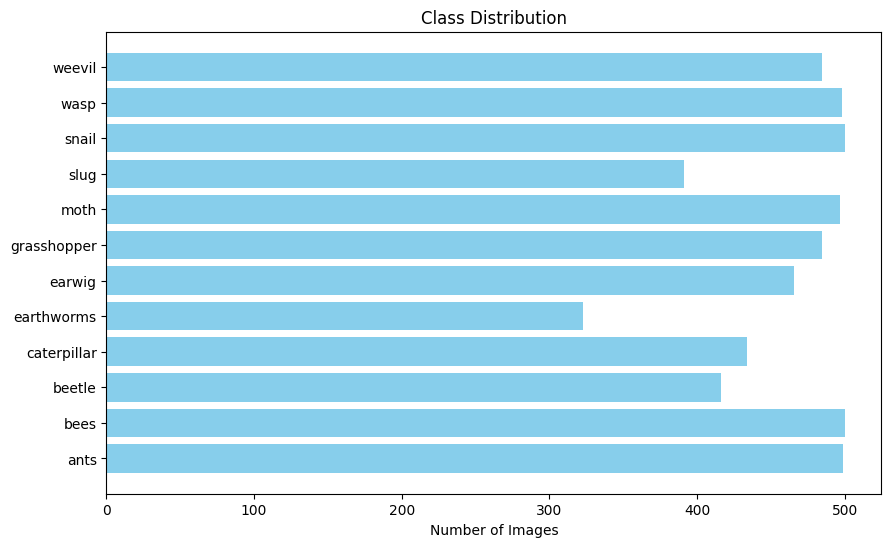

In [ ]:
import matplotlib.pyplot as plt

class_counts = {'ants': 499, 'bees': 500, 'beetle': 416, 'caterpillar': 434, 'earthworms': 323, 'earwig': 466, 'grasshopper': 485, 'moth': 497, 'slug': 391, 'snail': 500, 'wasp': 498, 'weevil': 485}
classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 6))
plt.barh(classes, counts, color='skyblue')
plt.xlabel('Number of Images')
plt.title('Class Distribution')
plt.show()

In [ ]:


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(12, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

print(" Model compiled successfully!")

from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_dir = "/content/pest_dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(12, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(train_generator, validation_data=validation_generator, epochs=40, verbose=1)



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,900 (18.42 MB)

 Trainable params: 4,829,900 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Model compiled successfully!
Found 4399 images belonging to 12 classes.
Found 1095 images belonging to 12 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,606,796 (9.94 MB)

 Trainable params: 2,606,796 (9.94 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.0826 - loss: 2.4894 - val_accuracy: 0.1014 - val_loss: 2.4788
Epoch 2/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.1035 - loss: 2.4689 - val_accuracy: 0.1032 - val_loss: 2.4426
Epoch 3/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.1213 - loss: 2.4424 - val_accuracy: 0.1689 - val_loss: 2.3784
Epoch 4/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.1519 - loss: 2.3755 - val_accuracy: 0.2073 - val_loss: 2.2746
Epoch 5/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.2262 - loss: 2.2412 - val_accuracy: 0.2740 - val_loss: 2.1576
Epoch 6/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.2638 - loss: 2.1495 - val_accuracy: 0.3059 - val_loss: 2.0449
Epoch 7/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.2967 - loss: 2.0479 - val_accuracy: 0.2977 - val_loss: 2.0401
Epoch 8/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.3152 - loss: 2.0324 - val_accu

In [ ]:
model.save("pest_model.h5")


In [ ]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,820,390 (29.83 MB)

 Trainable params: 2,606,796 (9.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,213,594 (19.89 MB)

In [ ]:
print(model.input_shape)


(None, 128, 128, 3)


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model("pest_model.h5")  # Update path if needed

class_labels = {
    "Ants": "Beneficial",
    "Bees": "Beneficial",
    "Beetle": "Beneficial",
    "Caterpillar": "Harmful",
    "Earthworms": "Beneficial",
    "Earwig": "Beneficial",
    "Grasshopper": "Harmful",
    "Moth": "Harmful",
    "Slug": "Harmful",
    "Snail": "Harmful",
    "Wasp": "Beneficial",
    "Weevil": "Harmful"
}

def predict_pest(img_path):

    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions)

    class_name = list(class_labels.keys())[predicted_class_idx]
    category = class_labels[class_name]

    print(f" → Category: {category}")

print("Earthworm:")
predict_pest("/content/earthworms (100).jpg")
print("Weevil:")
predict_pest("/content/Weevil (10).jpg")


Earthworm:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
 → Category: Beneficial
Weevil:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
 → Category: Harmful


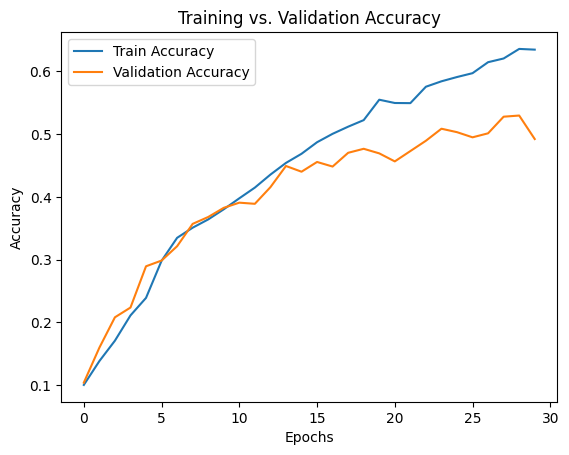

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()
